# Web Scraping using Python

## Table of Contents
* [Introduction](#Introduction)
* [Scraping of Weather Data](#Scraping)
    * [Weather Forecasting Data for Single City](#Single)
    * [Weather Forecasting Data for Multiple Cities](#Multiple)
* [Preprocessing and Visualizing the Data](#PreAndViz)
* [Conclusion](#Conclusion)
* [References](#References)

<a name="Introduction"></a>
## Introduction

Web Scraping is an important way of collecting data from the web. There are different types of data that are displayed systematically by web browsers. The data usually contains:

* HTML tags
* CSS styles
* javascript codes
* Images and other multimedia data

The documents in a web are organized in html tags. So, we can systematically scrape the needed data once we inspect its structure. In this post, I am going to show how to scrape weather forecasting data from [National Weather Service](http://forecast.weather.gov).

As an example in this post, we are going to select some of the most populous cities in the US. Then based on their location (latitutudes and longitudes), we will extract their corresponding weather data from the web site.

Once they extracted, we will structure the data and save in pandas data frames. Then, we will apply some preprocessing steps.

Finally we will visualize the data using some pythn visualization packages such as seaborn. The post is inspired by the post [here](https://www.dataquest.io/blog/web-scraping-tutorial-python/)

<a name="Scraping"></a>
## Scraping of Weather Data

<a name="Single"></a>
### * Weather Forecasting Data for Single City*

As a first step in scraping web data, we have to open the page on a browser and inspect how the data is structured. As an example, let's open the website and display weather data for one city, e.g., [Miami](http://forecast.weather.gov/MapClick.php?lat=25.7748&lon=-80.1977).

In this example, we are going to use google chrome to open the web page. After you open it, go to developer tools to inspect the structure of the page. Here, we are concerned only on the extended forecast data.

First let's import the necessary libraries

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**requests** package is used to download the data from a URL. **BeautifulSoup** is a package to select part of the downloaded data that is necessary for our analysis.

Download the Miami weather data

In [2]:
# Get dat
URL = ("http://forecast.weather.gov/MapClick.php?lat=25.7748&lon=-80.1977")
page = requests.get(URL)

Parse the content with BeautifulSoup and extract the seven day forecast. It will then find all the items (seven days). Finally one item is displayed.

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
first = forecast_items[0]
print(first.prettify())

<div class="tombstone-container">
 <p class="period-name">
  This
  <br/>
  Afternoon
 </p>
 <p>
  <img alt="This Afternoon: Showers and thunderstorms likely, mainly after 5pm.  Mostly sunny, with a high near 90. Southeast wind 7 to 10 mph.  Chance of precipitation is 60%. New rainfall amounts of less than a tenth of an inch, except higher amounts possible in thunderstorms. " class="forecast-icon" src="newimages/medium/hi_tsra60.png" title="This Afternoon: Showers and thunderstorms likely, mainly after 5pm.  Mostly sunny, with a high near 90. Southeast wind 7 to 10 mph.  Chance of precipitation is 60%. New rainfall amounts of less than a tenth of an inch, except higher amounts possible in thunderstorms. "/>
 </p>
 <p class="short-desc">
  T-storms
  <br/>
  Likely
 </p>
 <p class="temp temp-high">
  High: 90 °F
 </p>
</div>


From the above data, we can see that the information is organized in different html tags and classes/ids. Now, let's separate the data based on their classes for the selected item.

In [4]:
period = first.find(class_="period-name").get_text()
short_desc = first.find(class_="short-desc").get_text()
temp = first.find(class_="temp").get_text()

print(period)
print(short_desc)
print(temp)

ThisAfternoon
T-stormsLikely
High: 90 °F


Extract the description of the item's weather using img tag. The description is then saved in "title" value 

In [5]:
img = first.find("img")
desc = img['title']
print(desc)

This Afternoon: Showers and thunderstorms likely, mainly after 5pm.  Mostly sunny, with a high near 90. Southeast wind 7 to 10 mph.  Chance of precipitation is 60%. New rainfall amounts of less than a tenth of an inch, except higher amounts possible in thunderstorms. 


Now let's find the periods of weather forecasting data

In [6]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

[u'ThisAfternoon',
 u'Tonight',
 u'Saturday',
 u'SaturdayNight',
 u'Sunday',
 u'SundayNight',
 u'Monday',
 u'MondayNight',
 u'Tuesday']

So, we have already seen the data for a singl city. Now let's extract the forcasting data for multiple cities and futher process the data.

<a name="Multiple"></a>
### *Weather Forecasting Data for Multiple Cities*

Let's now prepare the lists of cities and their corresponding locations. N.B. Locations can be taken from the weather data website.

In [7]:
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
lats = [40.7146, 34.0535, 41.8843, 29.7606, 33.4483, 39.9522, 29.4246, 32.7157, 32.7782, 37.3387]
lons = [-74.0071, -118.2453, -87.6324, -95.3697, -112.0758, -75.1622, -98.4946, -117.1617, -96.7954, -121.8854]

Now, we will download the data for each city and save the necessary information

In [8]:
n_cities = len(cities)

periods = None
all_temps = []

for i in range(n_cities):
    print('Extracting data of: %s' % cities[i])
    URL = "http://forecast.weather.gov/MapClick.php?lat=" + str(lats[i]) + "&lon=" + str(lons[i])
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    seven_day = soup.find(id="seven-day-forecast")
    forecast_items = seven_day.find_all(class_="tombstone-container")
    period_tags = seven_day.select(".tombstone-container .period-name")

    #Let's save only the periods and their corresponding temperatures
    periods = [pt.get_text() for pt in period_tags]
    #short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
    temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
    #descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
    
    all_temps.append(temps)

Extracting data of: New York
Extracting data of: Los Angeles
Extracting data of: Chicago
Extracting data of: Houston
Extracting data of: Phoenix
Extracting data of: Philadelphia
Extracting data of: San Antonio
Extracting data of: San Diego
Extracting data of: Dallas
Extracting data of: San Jose


Let's now create create a pandas dataframe and save the temperature data.

In [9]:
weather = pd.DataFrame(data=all_temps, index=cities, columns=periods)
print(weather.shape)
weather.head()

(10, 9)


,Today,Tonight,Saturday,SaturdayNight,Sunday,SundayNight,Monday,MondayNight,Tuesday
New York,High: 83 °F,Low: 67 °F,High: 74 °F,Low: 62 °F,High: 80 °F,Low: 66 °F,High: 77 °F,Low: 67 °F,High: 83 °F
Los Angeles,High: 83 °F,Low: 67 °F,High: 82 °F,Low: 67 °F,High: 82 °F,Low: 67 °F,High: 83 °F,Low: 68 °F,High: 85 °F
Chicago,High: 75 °F,Low: 65 °F,High: 76 °F,Low: 66 °F,High: 78 °F,Low: 67 °F,High: 80 °F,Low: 69 °F,High: 86 °F
Houston,High: 98 °F,Low: 79 °F,High: 99 °F,Low: 79 °F,High: 96 °F,Low: 77 °F,High: 95 °F,Low: 76 °F,High: 94 °F
Phoenix,High: 101 °F,Low: 83 °F,High: 99 °F,Low: 80 °F,High: 99 °F,Low: 84 °F,High: 103 °F,Low: 85 °F,High: 105 °F


<a name="PreAndViz"></a>
## Preprocessing and Visualizing the Data

Now, we will only take the numerical temperature values to be used for further processing.

In [10]:
#Extract the numberical value of the temperature
for period in periods:
    weather[period] = weather[period].str.extract("(?P<temp_num>\d+)", expand=False)
    weather[period] = weather[period].astype('float')
weather.head()

,Today,Tonight,Saturday,SaturdayNight,Sunday,SundayNight,Monday,MondayNight,Tuesday
New York,83.0,67.0,74.0,62.0,80.0,66.0,77.0,67.0,83.0
Los Angeles,83.0,67.0,82.0,67.0,82.0,67.0,83.0,68.0,85.0
Chicago,75.0,65.0,76.0,66.0,78.0,67.0,80.0,69.0,86.0
Houston,98.0,79.0,99.0,79.0,96.0,77.0,95.0,76.0,94.0
Phoenix,101.0,83.0,99.0,80.0,99.0,84.0,103.0,85.0,105.0


We will now transpose the dataframe to enable us visualize temperature data for each city.

In [11]:
weather = weather.T
weather.head()

,New York,Los Angeles,Chicago,Houston,Phoenix,Philadelphia,San Antonio,San Diego,Dallas,San Jose
Today,83.0,83.0,75.0,98.0,101.0,85.0,102.0,76.0,102.0,90.0
Tonight,67.0,67.0,65.0,79.0,83.0,69.0,76.0,68.0,80.0,59.0
Saturday,74.0,82.0,76.0,99.0,99.0,73.0,103.0,76.0,97.0,87.0
SaturdayNight,62.0,67.0,66.0,79.0,80.0,63.0,78.0,67.0,77.0,59.0
Sunday,80.0,82.0,78.0,96.0,99.0,79.0,100.0,77.0,94.0,90.0


We can now visualize the data using different kinds of plots. Now we will use seaborn boxplot to display the temperature forcasting data.

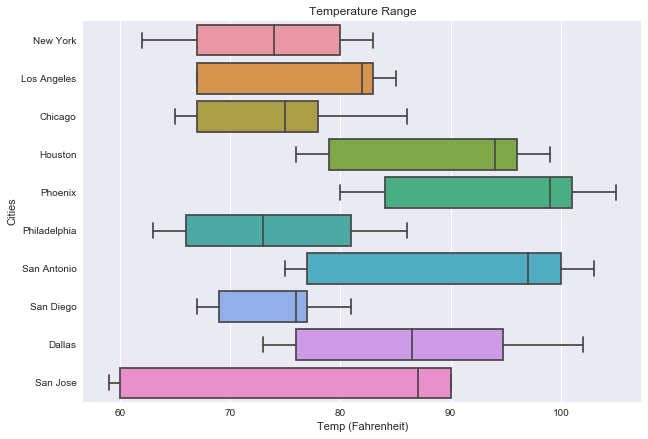

In [12]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 7))
fig = sns.boxplot(data=weather, ax=ax, orient='h')
fig.set_title('Temperature Range')
fig.set_xlabel('Temp (Fahrenheit)')
fig.set_ylabel('Cities')
plt.show()

<a name="Conclusion"></a>
## Conclusion

In this post, we have scraped weather forcasting data of different US cities. Finally, we preprocessed and visualized it. To get more information on Scraping, please go to the links given in the reference section.

<a name="References"></a>
## References

* [Web Scraping using BeautifulSoup](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Extracting Web Data using Python API](https://www.dataquest.io/blog/python-api-tutorial/)
* [Web Scraping Job Postings from Indeed](https://medium.com/@msalmon00/web-scraping-job-postings-from-indeed-96bd588dcb4b)
* [Scraping For Data — A Practical Guide](https://medium.com/k-folds/scraping-for-data-a-practical-guide-67cc397450b2)